<a href="https://colab.research.google.com/github/samratkar/samratkar.github.io/blob/main/Diffusion_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 (α = 1.00):
[[0.9 0.7 0.2]
 [0.1 0.5 0.8]
 [0.3 0.6 0.4]] 

Step 2 (α = 0.75):
[[1.    0.537 0.497]
 [0.848 0.316 0.576]
 [1.    0.903 0.112]] 

Step 3 (α = 0.50):
[[0.988 0.397 0.599]
 [1.    0.188 0.4  ]
 [1.    0.967 0.   ]] 

Step 4 (α = 0.25):
[[0.88  0.23  0.661]
 [1.    0.047 0.197]
 [1.    0.965 0.   ]] 

Step 5 (α = 0.00):
[[0.497 0.    0.648]
 [1.    0.    0.   ]
 [1.    0.767 0.   ]] 



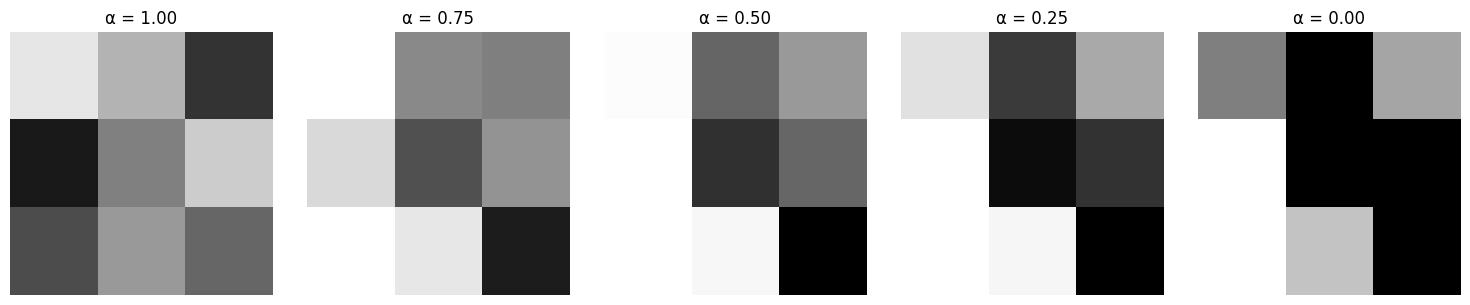

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original 3x3 grayscale image (normalized between 0 and 1)
x0 = np.array([
    [0.9, 0.7, 0.2],
    [0.1, 0.5, 0.8],
    [0.3, 0.6, 0.4]
])

# Set seed for reproducibility
np.random.seed(42)

# Define noise to be constant for all steps
epsilon = np.random.normal(0, 1, x0.shape)

# Define alpha values (level of original image retained)
steps = 5
alphas = np.linspace(1.0, 0.0, steps)

# Plotting setup
fig, axs = plt.subplots(1, steps, figsize=(15, 3))

# Loop through each step and apply the noising transformation
for i, alpha in enumerate(alphas):
    sqrt_alpha = np.sqrt(alpha)
    sqrt_one_minus_alpha = np.sqrt(1 - alpha)

    # Apply the noising formula
    x_t = sqrt_alpha * x0 + sqrt_one_minus_alpha * epsilon
    x_t = np.clip(x_t, 0, 1)  # Clamp values between 0 and 1 for visualization

    # Print matrix values
    print(f"Step {i+1} (α = {alpha:.2f}):")
    print(np.round(x_t, 3), "\n")

    # Show image
    axs[i].imshow(x_t, cmap='gray', vmin=0, vmax=1)
    axs[i].set_title(f"α = {alpha:.2f}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()
